 # Time Series Forecasting 

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. 
**I am going to  predict Gold price with time series forecasting using RNN method**

 Time Series Forecasting using CNN-LSTM


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import os


# Any results you write to the current directory are saved as output.

In [2]:
 sns.set_theme(style='white')

In [3]:
df = pd.read_excel(r'/content/Gold_data.xlsx')

In [4]:
df.columns

Index(['date', 'price'], dtype='object')

In [5]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [6]:
df.tail()

,date,price
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [7]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [9]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)
data =df.resample('D').mean()

In [10]:
data = data[['price' ]]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [12]:
from scipy.interpolate import interp1d

In [13]:
data['price'] = data['price'].interpolate()
# we will fill the null row

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [15]:
data.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [16]:
len(data)

2182

In [17]:
df = data.copy()

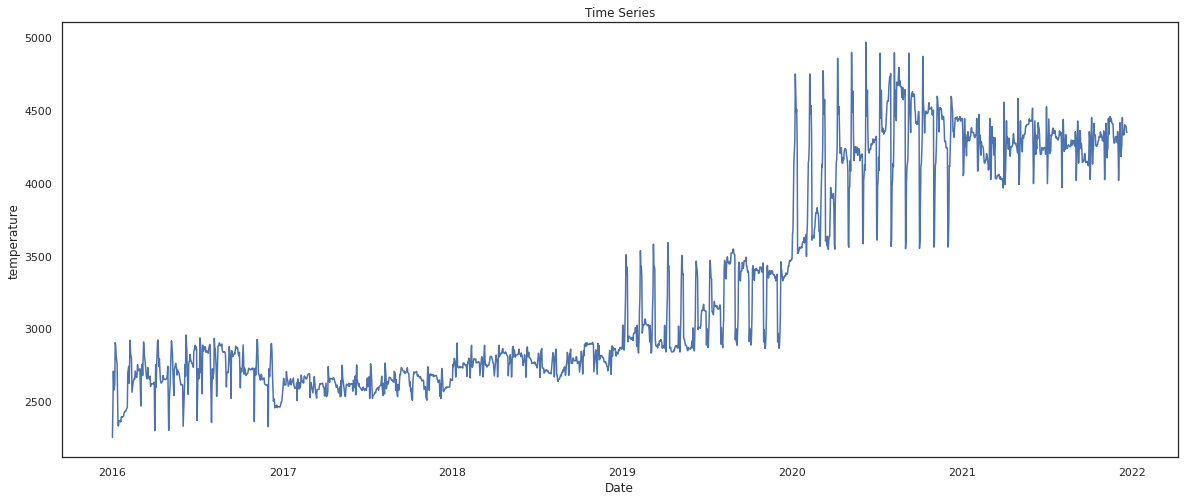

In [18]:
plt.figure(figsize=(20,8))
plt.plot(data)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

# Time Series Forecast using LSTM

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.


In [19]:
data=data.values
data = data.astype('float32')

In [20]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(data)

In [21]:
sc

array([[-1.        ],
       [-0.8511995 ],
       [-0.66429603],
       ...,
       [ 0.57489777],
       [ 0.5488081 ],
       [ 0.5432067 ]], dtype=float32)

In [22]:
len(df)

2182

In [23]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 2000
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]   

In [24]:
print(Xtrain.shape)
print(Xtest.shape)

(2000, 30, 1)
(152, 30, 1)


In [25]:
Xtrain

array([[[-1.        ],
        [-0.8511995 ],
        [-0.66429603],
        ...,
        [-0.8683717 ],
        [-0.8691087 ],
        [-0.86347055]],

       [[-0.8511995 ],
        [-0.66429603],
        [-0.7603272 ],
        ...,
        [-0.8691087 ],
        [-0.86347055],
        [-0.85783255]],

       [[-0.66429603],
        [-0.7603272 ],
        [-0.7456242 ],
        ...,
        [-0.86347055],
        [-0.85783255],
        [-0.85219455]],

       ...,

       [[ 0.4350152 ],
        [ 0.46707463],
        [ 0.45933628],
        ...,
        [ 0.5393009 ],
        [ 0.5393009 ],
        [ 0.55345106]],

       [[ 0.46707463],
        [ 0.45933628],
        [ 0.45904112],
        ...,
        [ 0.5393009 ],
        [ 0.55345106],
        [ 0.53259397]],

       [[ 0.45933628],
        [ 0.45904112],
        [ 0.45425057],
        ...,
        [ 0.55345106],
        [ 0.53259397],
        [ 0.5167484 ]]], dtype=float32)

In [26]:
Ytrain

array([[-0.85783255],
       [-0.85219455],
       [-0.8465564 ],
       ...,
       [ 0.53259397],
       [ 0.5167484 ],
       [ 0.5229392 ]], dtype=float32)

In [27]:
print(Ytrain.shape)
print(Ytest.shape)

(2000, 1)
(152, 1)


 # LSTM Model

In [28]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (30,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 30, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1)

Epoch 1/300
63/63 [==============================] - 8s 45ms/step - loss: 0.1059
Epoch 2/300
63/63 [==============================] - 3s 46ms/step - loss: 0.0196
Epoch 3/300
63/63 [==============================] - 3s 46ms/step - loss: 0.0188
Epoch 4/300
63/63 [==============================] - 3s 45ms/step - loss: 0.0187
Epoch 5/300
63/63 [==============================] - 3s 47ms/step - loss: 0.0186
Epoch 6/300
63/63 [==============================] - 3s 46ms/step - loss: 0.0176
Epoch 7/300
63/63 [==============================] - 3s 42ms/step - loss: 0.0175
Epoch 8/300
63/63 [==============================] - 3s 43ms/step - loss: 0.0165
Epoch 9/300
63/63 [==============================] - 3s 46ms/step - loss: 0.0175
Epoch 10/300
63/63 [==============================] - 3s 45ms/step - loss: 0.0149
Epoch 11/300
63/63 [==============================] - 3s 44ms/step - loss: 0.0132
Epoch 12/300
63/63 [==============================] - 3s 46ms/step - loss: 0.0113
Epoch 13/300
63/63 [=====

Text(0.5, 1.0, 'Model Accuracy')

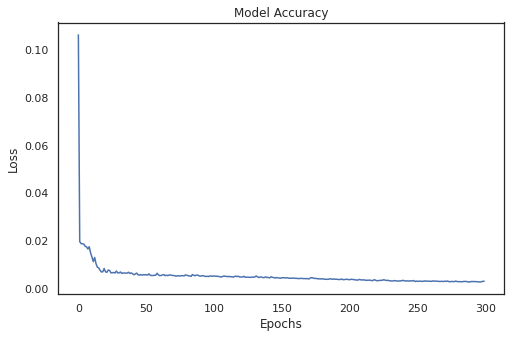

In [31]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [32]:
import pickle

In [33]:
pickle.dump(model,open('lstm_model.pkl','wb'))

In [34]:
model.save('lstm_mode_mrunal.dell')

In [35]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

5/5 [==============================] - 1s 14ms/step


5789.983

In [36]:
pre= model.predict(Xtrain)
pre = scaler.inverse_transform(pre)

63/63 [==============================] - 1s 14ms/step


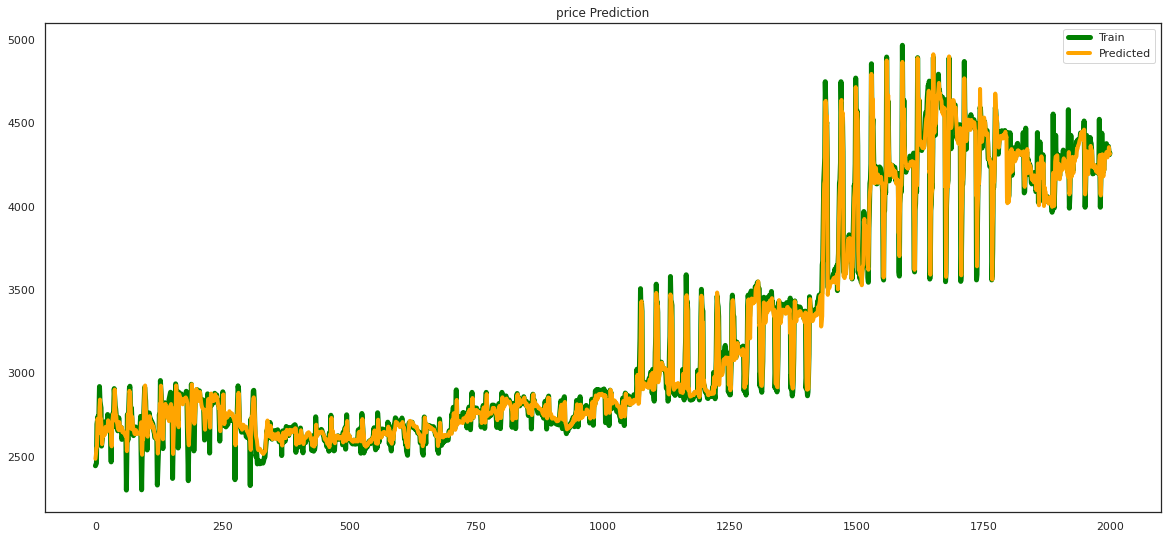

In [37]:
plt.figure(figsize=(20,9))
plt.plot(Ytrain , 'green', linewidth=5)
plt.plot(pre,'orange' , linewidth=4)
plt.legend(('Train','Predicted'))
plt.title("price Prediction")
plt.show()

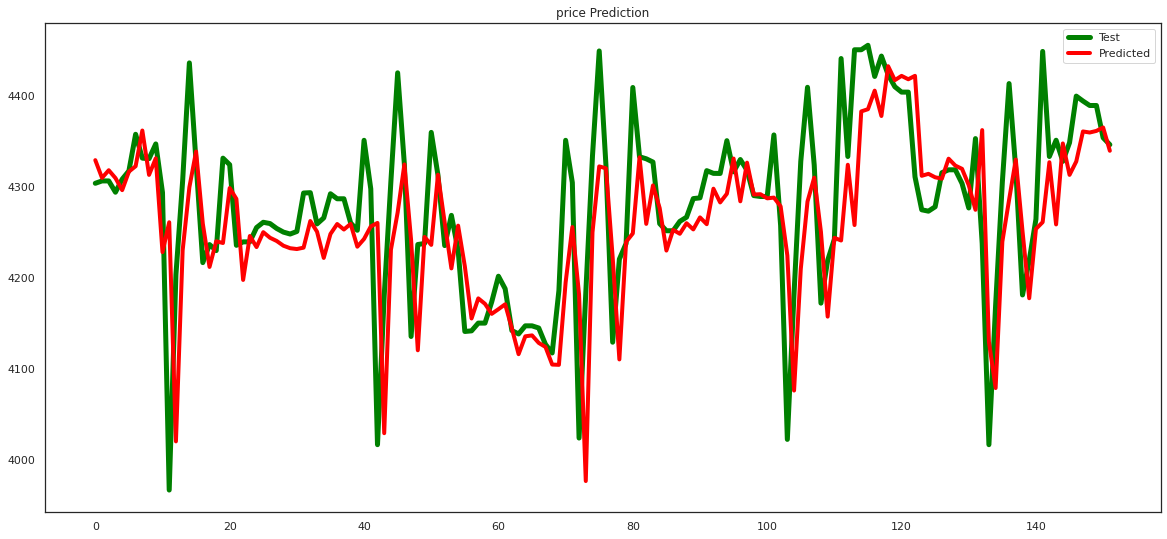

In [38]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'green', linewidth=5)
plt.plot(preds,'red' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("price Prediction")
plt.show()

In [39]:
edtest = pd.DataFrame(Ytest,columns=['Actual'])
pred = pd.DataFrame(preds,columns=['Predict'])

In [40]:
results = pd.concat([edtest,pred],axis=1)

In [41]:
results.head(20)

,Actual,Predict
0,4304.100098,4329.503418
1,4306.700195,4310.002441
2,4306.700195,4318.436035
3,4294.299805,4309.840332
4,4308.600098,4296.595215
5,4317.700195,4316.924316
6,4357.899902,4322.848145
7,4331.700195,4362.026855
8,4331.100098,4313.306641
9,4347.299805,4331.544434


In [42]:
def insert_end(Xin,new_input):
    #print ('Before: \n', Xin , new_input )
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    #print ('After :\n', Xin)
    return Xin


In [43]:
df

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [44]:
# this section for unknown future
#we are getting next 30 steps
from datetime import timedelta
future=30
forcast = []
Xin = Xtest[-1:,:,:]
time=[]
for i in range(future):
    out = model.predict(Xin, batch_size=1)    
    forcast.append(out[0,0]) 
    print(forcast)
    Xin = insert_end(Xin,out[0,0]) 
    time.append(pd.to_datetime(df.index[-1])+timedelta(days=i+1))


1/1 [==============================] - 0s 26ms/step
[0.5382687]
1/1 [==============================] - 0s 25ms/step
[0.5382687, 0.5460107]
1/1 [==============================] - 0s 28ms/step
[0.5382687, 0.5460107, 0.5583703]
1/1 [==============================] - 0s 35ms/step
[0.5382687, 0.5460107, 0.5583703, 0.5687178]
1/1 [==============================] - 0s 29ms/step
[0.5382687, 0.5460107, 0.5583703, 0.5687178, 0.57473]
1/1 [==============================] - 0s 31ms/step
[0.5382687, 0.5460107, 0.5583703, 0.5687178, 0.57473, 0.5744428]
1/1 [==============================] - 0s 29ms/step
[0.5382687, 0.5460107, 0.5583703, 0.5687178, 0.57473, 0.5744428, 0.5722944]
1/1 [==============================] - 0s 28ms/step
[0.5382687, 0.5460107, 0.5583703, 0.5687178, 0.57473, 0.5744428, 0.5722944, 0.57327235]
1/1 [==============================] - 0s 33ms/step
[0.5382687, 0.5460107, 0.5583703, 0.5687178, 0.57473, 0.5744428, 0.5722944, 0.57327235, 0.5787774]
1/1 [==============================]

In [45]:
forcasted_output=np.asanyarray(forcast)   
forcasted_output=forcasted_output.reshape(-1,1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [46]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output],axis=1)
df_result.columns = "Date","Forecasted"

In [47]:
df.columns

Index(['price'], dtype='object')

In [48]:
df_result

,Date,Forecasted
0,2021-12-22,4339.799805
1,2021-12-23,4350.304688
2,2021-12-24,4367.074707
3,2021-12-25,4381.114258
4,2021-12-26,4389.271973
5,2021-12-27,4388.882812
6,2021-12-28,4385.967773
7,2021-12-29,4387.294434
8,2021-12-30,4394.763672
9,2021-12-31,4411.147949


## Prediction for next 30 days is shown in the graphs

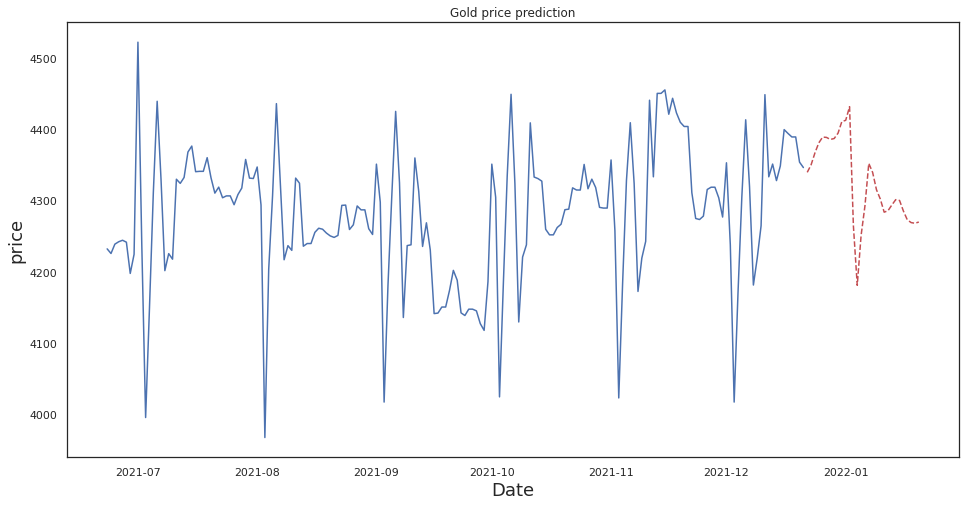

In [49]:
plt.figure(figsize=(16,8))
plt.title('Gold price prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price' ,fontsize=18)
plt.plot(df['price'][2000:])
plt.plot(df_result.set_index('Date')[['Forecasted']],"r--")

In [50]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  

In [51]:
# Calculate mean squared error
mean_squared_error(Ytest, pred)

5789.983

In [52]:
# Calculate root mean squared error
rmse(Ytest, pred)

array([76.091934], dtype=float32)


### The RMSE value for LSTM model is 76.09